In [1]:
import pandas as pd
import numpy as np

In [2]:
loan_data_preprocessed_backup = pd.read_csv('D:/Credit Risk Modelling/loan_data_2007_2014_preprocessed.csv')

C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_8740\1930953639.py:1: DtypeWarning: Columns (21,49) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_preprocessed_backup = pd.read_csv('D:/Credit Risk Modelling/loan_data_2007_2014_preprocessed.csv')


In [3]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

In [4]:
loan_data_preprocessed.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,0,0,0,0,0,1,0,0
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,0,0,0,0,0,0,1,0,1
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,0,0,0,0,0,0,1,0,1
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,0,0,0,0,0,0,1,0,1


In [5]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off',
                                                                                        'Doess not meet the credit policy. Status:Charged Off'])]

In [6]:
loan_data_defaults.shape

(42475, 209)

In [7]:
pd.options.display.max_rows = None

In [8]:
# To check number of missing values of each column
loan_data_defaults.isnull().sum()

Unnamed: 0.1                                                           0
Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3237
emp_length                                         

# Independent Variables

In [9]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)

C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_8740\188862553.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_8740\188862553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_delinq

In [10]:
loan_data_defaults['mths_since_last_record'].fillna(0, inplace = True)

C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_8740\19061281.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data_defaults['mths_since_last_record'].fillna(0, inplace = True)
C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_8740\19061281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_record']

# Dependent Variables

In [11]:
# Calculating the recovery rate
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_8740\1734593908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']


In [12]:
loan_data_defaults['recovery_rate'].describe()

count    42475.000000
mean         0.060802
std          0.088033
min          0.000000
25%          0.000000
50%          0.030302
75%          0.114715
max          1.220774
Name: recovery_rate, dtype: float64

In [13]:
# Sometimes RR exceeds 1 or gets lower than 0. Casting those values to 1 and 0
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])

C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_8740\1007059931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_8740\1007059931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])


In [14]:
loan_data_defaults['recovery_rate'].describe()

count    42475.000000
mean         0.060763
std          0.087586
min          0.000000
25%          0.000000
50%          0.030302
75%          0.114715
max          1.000000
Name: recovery_rate, dtype: float64

In [15]:
# Calculating Credit Conversion Factor
# (Total funded amnt - Principal repaid) as proportion of Total Funded amnt
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']

C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_8740\1033209325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']


In [16]:
loan_data_defaults['CCF'].describe()

count    42475.000000
mean         0.737033
std          0.199849
min          0.000438
25%          0.634095
50%          0.790682
75%          0.888871
max          1.000000
Name: CCF, dtype: float64

In [17]:
loan_data_defaults.to_csv('loan_data_defaults.csv')

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([2.065e+04, 1.654e+03, 3.767e+03, 1.386e+03, 2.129e+03, 3.336e+03,
        4.757e+03, 1.710e+03, 1.173e+03, 3.990e+02, 3.360e+02, 2.740e+02,
        1.100e+02, 9.100e+01, 8.100e+01, 7.200e+01, 5.400e+01, 6.900e+01,
        5.400e+01, 2.700e+01, 4.400e+01, 2.700e+01, 1.600e+01, 1.500e+01,
        1.900e+01, 2.200e+01, 1.700e+01, 7.000e+00, 9.000e+00, 6.000e+00,
        8.000e+00, 6.000e+00, 7.000e+00, 6.000e+00, 5.000e+00, 9.000e+00,
        4.000e+00, 1.000e+01, 8.000e+00, 9.000e+00, 4.000e+00, 6.000e+00,
        6.000e+00, 3.000e+00, 8.000e+00, 7.000e+00, 1.400e+01, 7.000e+00,
        8.000e+00, 2.900e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 

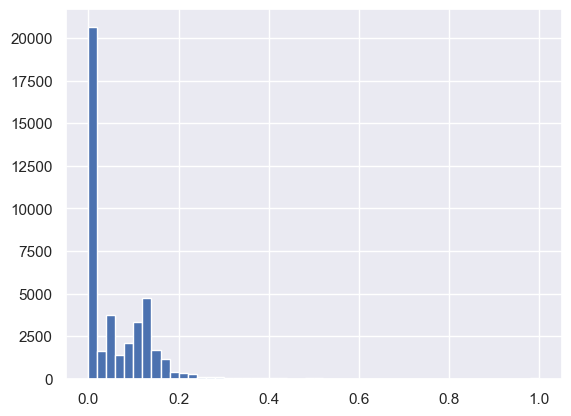

In [19]:
# Plotting a histrogram of th3ee recovery rate
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)

(array([   3.,   16.,   15.,   43.,   16.,   13.,   68.,   24.,    7.,
          60.,   63.,   17.,   57.,   87.,   21.,   54.,   79.,   42.,
          47.,  121.,   78.,   67.,  118.,   84.,   86.,  101.,  111.,
         108.,  116.,  114.,  133.,  134.,  152.,  144.,  152.,  166.,
         146.,  182.,  194.,  168.,  198.,  202.,  207.,  207.,  237.,
         260.,  274.,  219.,  304.,  263.,  284.,  289.,  333.,  272.,
         358.,  358.,  388.,  358.,  383.,  410.,  402.,  417.,  433.,
         487.,  465.,  473.,  562.,  559.,  588.,  607.,  714.,  682.,
         616.,  788.,  794.,  765.,  863.,  841.,  895.,  929.,  907.,
        1057.,  927., 1203., 1032., 1074., 1313., 1032., 1353., 1067.,
        1384., 1270.,  938., 1390.,  794., 1287.,  576.,  920.,  341.,
         519.]),
 array([4.3800000e-04, 1.0433620e-02, 2.0429240e-02, 3.0424860e-02,
        4.0420480e-02, 5.0416100e-02, 6.0411720e-02, 7.0407340e-02,
        8.0402960e-02, 9.0398580e-02, 1.0039420e-01, 1.1038982e-01

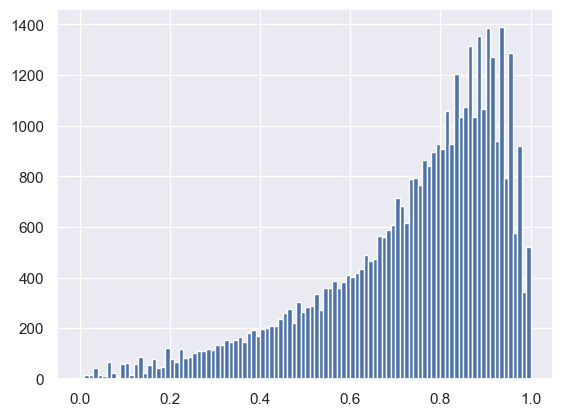

In [20]:
# Plotting a histrogram of th3ee CCF
plt.hist(loan_data_defaults['CCF'], bins = 100)

In [21]:
# Modelling RR. Setting RR values to 0 and 1.
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)

C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_8740\3639736736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)


In [22]:
loan_data_defaults['recovery_rate_0_1'].head()

1     1
8     1
9     1
12    1
14    1
Name: recovery_rate_0_1, dtype: int64

# LGD Model

## Splliting Data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Dividing the i/p and o/p data into train test split
# i/p = All data except good_bad, recovery_rate, recovery_rate_0_1
# o/p = 
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)

In [25]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']
# List of all independent variables for the models.

In [26]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']
# List of the dummy variable reference categories. 

In [27]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

In [28]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)

## Estimating the Model

In [29]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [30]:
reg_lgd_st_1 = LogisticRegression_with_p_values()
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)

C:\Users\Aritro Das\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
feature_name = lgd_inputs_stage_1_train.columns.values

In [32]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_st_1.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-2.643401e-04,NaN
1,grade:A,-3.621907e-05,9.996739e-01
2,grade:B,-1.874739e-04,9.979084e-01
3,grade:C,-2.287849e-04,9.973323e-01
4,grade:D,-5.553214e-06,9.999373e-01
5,grade:E,4.300860e-05,9.995579e-01
6,grade:F,1.336661e-04,9.988058e-01
7,home_ownership:MORTGAGE,-1.321081e-04,9.959019e-01
8,home_ownership:NONE,1.935240e-06,9.999980e-01
9,home_ownership:OTHER,1.148389e-06,9.999982e-01


## Testing the Model

In [33]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]

In [34]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis = 1)

In [35]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)

In [36]:
# Get predictions of the recovery rate using test data
y_hat_test_lgd_stage_1

array([1, 0, 1, ..., 1, 1, 0])

In [37]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)

In [38]:
y_hat_test_proba_lgd_stage_1

array([[0.38398341, 0.61601659],
       [0.69191006, 0.30808994],
       [0.31675303, 0.68324697],
       ...,
       [0.49085113, 0.50914887],
       [0.45558889, 0.54441111],
       [0.51591822, 0.48408178]])

In [39]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]

In [40]:
y_hat_test_proba_lgd_stage_1

array([0.61601659, 0.30808994, 0.68324697, ..., 0.50914887, 0.54441111,
       0.48408178])

In [41]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test

In [42]:
lgd_targets_stage_1_test_temp.reset_index(drop = True, inplace = True)

In [43]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis = 1)

In [44]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1']

In [45]:
df_actual_predicted_probs.index = lgd_inputs_stage_1_test.index

In [46]:
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
88068,1,0.616017
340018,0,0.308090
3816,0,0.683247
29236,0,0.765167
109278,1,0.616932


## Estimating the Accuracy of the Model

In [47]:
tr = 0.5
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [48]:
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,1312,2386
1,887,3910


In [49]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.154444,0.280871
1,0.104414,0.460271


In [50]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

np.float64(0.614714537963508)

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

In [52]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
# we store each of the three arrays in a separate variable.

Text(0.5, 1.0, 'ROC curve')

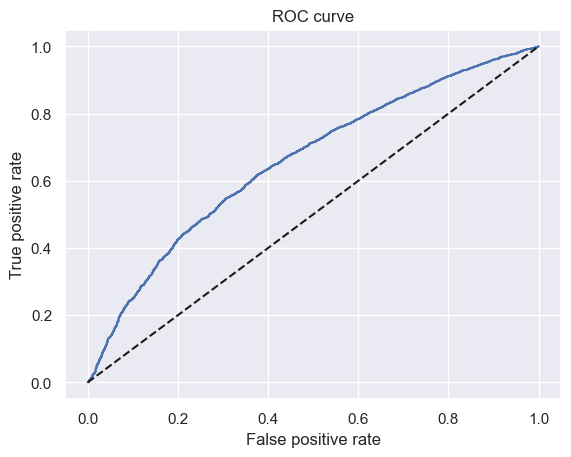

In [53]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [54]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

np.float64(0.6577637817398267)

## Saving the Model

In [55]:
import pickle

In [56]:
pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'lgd_model_stage_1.sav'.

## Stage 2 - Linear regression

In [57]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]
# Here we take only rows where the original recovery rate variable is greater than one,
# i.e. where the indicator variable we created is equal to 1.

In [58]:
# LGD model stage 2 datasets: how much more than 0 is the recovery rate
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

In [59]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1, positive=False):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.positive = positive
        self.copy_X = copy_X
        self.n_jobs = n_jobs
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [61]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]
# Here we keep only the variables we need for the model.

In [62]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [63]:
reg_lgd_st_2 = LinearRegression()
# We create an instance of an object from the 'LogisticRegression' class.
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

LinearRegression()

In [64]:
feature_name = lgd_inputs_stage_2_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [65]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_st_2.p
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values.round(3)
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.264341e-01,NaN
1,grade:A,-4.815164e-02,0.000
2,grade:B,-3.688998e-02,0.000
3,grade:C,-2.532823e-02,0.000
4,grade:D,-1.739225e-02,0.000
5,grade:E,-6.432096e-03,0.126
6,grade:F,-1.451865e-03,0.761
7,home_ownership:MORTGAGE,3.681100e-03,0.011
8,home_ownership:NONE,2.727074e-01,0.000
9,home_ownership:OTHER,-4.963639e-03,0.831


## Linear Regression Evaluation

In [66]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]
# Here we keep only the variables we need for the model.

In [67]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [68]:
lgd_inputs_stage_2_test.columns.values
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'mths_since_issue_d', 'mths_since_earliest_cr_line', 'funded_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [69]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [70]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test

In [71]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop = True)
# We reset the index of a dataframe.

In [72]:
pd.concat([lgd_targets_stage_2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis = 1).corr()
# We calculate the correlation between actual and predicted values.

,recovery_rate,0
recovery_rate,1.000000,0.318349
0,0.318349,1.000000


C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_8740\3715051216.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)


<Axes: xlabel='recovery_rate', ylabel='Density'>

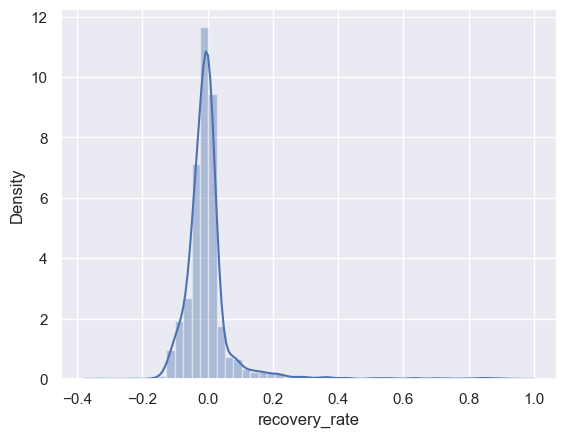

In [73]:
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)
# We plot the distribution of the residuals.

In [74]:
pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'lgd_model_stage_1.sav'.

## Combing Stage 1 and Stage 2

In [75]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [76]:
# Recovery rates for intital test dataset
y_hat_test_lgd_stage_2_all

array([0.10610923, 0.15761235, 0.09715261, ..., 0.14875221, 0.08835487,
       0.13009296])

In [77]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all
# Here we combine the predictions of the models from the two stages.

In [78]:
pd.DataFrame(y_hat_test_lgd).describe()
# Shows some descriptive statisics for the values of a column.

,0
count,8495.000000
mean,0.077938
std,0.051946
min,-0.014771
25%,0.000000
50%,0.095289
75%,0.118580
max,0.205454


In [79]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.

In [80]:
pd.DataFrame(y_hat_test_lgd).describe()
# Shows some descriptive statisics for the values of a column.

,0
count,8495.000000
mean,0.077941
std,0.051941
min,0.000000
25%,0.000000
50%,0.095289
75%,0.118580
max,0.205454


# EAD Model

## Estimation and Interpretation

In [81]:
# EAD model datasets
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['CCF'], test_size = 0.2, random_state = 42)
# Takes a set of inputs and a set of targets as arguments. Splits the inputs and the targets into four dataframes:
# Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.

In [82]:
ead_inputs_train.columns.values

array(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'member_id', 'loan_amnt',
       'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_join

In [83]:
ead_inputs_train = ead_inputs_train[features_all]
# Here we keep only the variables we need for the model.

In [84]:
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [85]:
reg_ead = LinearRegression()
reg_ead.fit(ead_inputs_train, ead_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

LinearRegression()

In [86]:
feature_name = ead_inputs_train.columns.values

In [87]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_ead.p
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.089334e+00,NaN
1,grade:A,-2.687641e-01,0.000000e+00
2,grade:B,-2.122175e-01,0.000000e+00
3,grade:C,-1.514182e-01,0.000000e+00
4,grade:D,-1.047741e-01,0.000000e+00
5,grade:E,-5.596866e-02,0.000000e+00
6,grade:F,-1.361975e-02,6.259323e-02
7,home_ownership:MORTGAGE,-5.201848e-03,1.320736e-02
8,home_ownership:NONE,-2.974480e-02,6.427745e-01
9,home_ownership:OTHER,3.777250e-02,2.769188e-01


## Model Validation

In [88]:
ead_inputs_test = ead_inputs_test[features_all]
# Here we keep only the variables we need for the model.

In [89]:
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [90]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [91]:
ead_targets_test_temp = ead_targets_test

In [92]:
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)
# We reset the index of a dataframe.

In [93]:
pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()
# We calculate the correlation between actual and predicted values.

,CCF,0
CCF,1.000000,0.537764
0,0.537764,1.000000


C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_8740\4041840738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ead_targets_test - y_hat_test_ead)


<Axes: xlabel='CCF', ylabel='Density'>

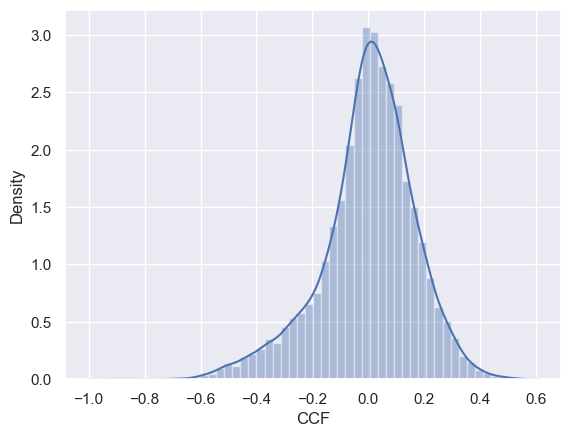

In [94]:
sns.distplot(ead_targets_test - y_hat_test_ead)
# We plot the distribution of the residuals (actual values - predicted values).

In [95]:
pd.DataFrame(y_hat_test_ead).describe()
# Shows some descriptive statisics for the values of a column.

,0
count,8495.000000
mean,0.737178
std,0.106679
min,0.362317
25%,0.662338
50%,0.732477
75%,0.812484
max,0.996482


In [96]:
y_hat_test_ead = np.where(y_hat_test_ead < 0, 0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.

In [97]:
pd.DataFrame(y_hat_test_ead).describe()
# Shows some descriptive statisics for the values of a column.

,0
count,8495.000000
mean,0.737178
std,0.106679
min,0.362317
25%,0.662338
50%,0.732477
75%,0.812484
max,0.996482


# Expected Loss

In [99]:
loan_data_preprocessed.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,0,0,0,0,0,1,0,0
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,0,0,0,0,0,0,1,0,1
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,0,0,0,0,0,0,1,0,1
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,0,0,0,0,0,0,1,0,1


In [101]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace = True)
# We fill the missing values with zeroes.

C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_8740\3236500179.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace = True)


In [102]:
loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace = True)
# We fill the missing values with zeroes.

C:\Users\Aritro Das\AppData\Local\Temp\ipykernel_8740\3460898469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace = True)


In [103]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features_all]
# Here we keep only the variables we need for the model.

In [104]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(features_reference_cat, axis = 1)
# Here we remove the dummy variable reference categories.

In [105]:
loan_data_preprocessed['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(loan_data_preprocessed_lgd_ead)
# We apply the stage 1 LGD model and calculate predicted values.

In [106]:
loan_data_preprocessed['recovery_rate_st_2'] = reg_lgd_st_2.predict(loan_data_preprocessed_lgd_ead)
# We apply the stage 2 LGD model and calculate predicted values.

In [107]:
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st_1'] * loan_data_preprocessed['recovery_rate_st_2']
# We combine the predicted values from the stage 1 predicted model and the stage 2 predicted model
# to calculate the final estimated recovery rate.

In [108]:
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] < 0, 0, loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] > 1, 1, loan_data_preprocessed['recovery_rate'])
# We set estimated recovery rates that are greater than 1 to 1 and  estimated recovery rates that are less than 0 to 0.

In [109]:
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']
# We calculate estimated LGD. Estimated LGD equals 1 - estimated recovery rate.

In [110]:
loan_data_preprocessed['LGD'].describe()
# Shows some descriptive statisics for the values of a column.

count    466285.000000
mean          0.930419
std           0.057986
min           0.370269
25%           0.879127
50%           0.911265
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

In [111]:
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_preprocessed_lgd_ead)
# We apply the EAD model to calculate estimated credit conversion factor.

In [112]:
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] < 0, 0, loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] > 1, 1, loan_data_preprocessed['CCF'])
# We set estimated CCF that are greater than 1 to 1 and  estimated CCF that are less than 0 to 0.

In [113]:
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF'] * loan_data_preprocessed_lgd_ead['funded_amnt']
# We calculate estimated EAD. Estimated EAD equals estimated CCF multiplied by funded amount.

In [114]:
loan_data_preprocessed['EAD'].describe()
# Shows some descriptive statisics for the values of a column.

count    466285.000000
mean      10807.783464
std        6932.879958
min         179.525424
25%        5489.048712
50%        9206.648029
75%       14694.501758
max       35000.000000
Name: EAD, dtype: float64

In [115]:
loan_data_preprocessed.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad,recovery_rate_st_1,recovery_rate_st_2,recovery_rate,LGD,CCF,EAD
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,1,0,1,1,0.078856,0.078856,0.921144,0.578223,2891.112890
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,1,0,0,1,0.076744,0.076744,0.923256,0.774265,1935.662839
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,1,0,1,1,0.076405,0.076405,0.923595,0.653490,1568.375698
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,1,0,1,1,0.090202,0.090202,0.909798,0.652579,6525.789448
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,1,0,1,1,0.088010,0.088010,0.911990,0.710149,2130.445782


In [116]:
loan_data_inputs_train = pd.read_csv('D:/Credit Risk Modelling/loanData_inputs_train.csv')
# We import data to apply the PD model.

In [117]:
loan_data_inputs_test = pd.read_csv('D:/Credit Risk Modelling/loanData_inputs_test.csv')
# We import data to apply the PD model.

In [118]:
loan_data_inputs_pd = pd.concat([loan_data_inputs_train, loan_data_inputs_test], axis = 0)
# We concatenate the two dataframes along the rows.

In [119]:
loan_data_inputs_pd.shape

(466285, 324)

In [120]:
loan_data_inputs_pd.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
0,427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,...,1,0,0,1,0,0,0,0,0,0
1,206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,...,0,0,0,1,0,0,0,0,0,0
2,136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,...,0,0,0,1,0,0,0,0,0,0
3,412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,...,0,0,0,1,0,0,0,0,0,0
4,36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,...,0,1,0,1,0,0,0,0,0,0


In [121]:
loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')
# We set the index of the dataframe to the values of a specific column. 

In [122]:
features_all_pd = ['Grade: A',
'Grade: B',
'Grade: C',
'Grade: D',
'Grade: E',
'Grade: F',
'Grade: G',
'Home_Ownership: RENT_OTHER_NONE_ANY',
'Home_Ownership: OWN',
'Home_Ownership: MORTGAGE',
'Addr_State: ND_NE_IA_NV_FL_HI_AL',
'Addr_State: NM_VA',
'Addr_State: NY',
'Addr_State: OK_TN_MO_LA_MD_NC',
'Addr_State: CA',
'Addr_State: UT_KY_AZ_NJ',
'Addr_State: AR_MI_PA_OH_MN',
'Addr_State: RI_MA_DE_SD_IN',
'Addr_State: GA_WA_OR',
'Addr_State: WI_MT',
'Addr_State: TX',
'Addr_State: IL_CT',
'Addr_State: KS_SC_CO_VT_AK_MS',
'Addr_State: WV_NH_WY_DC_ME_ID',
'Verification_Status: Not Verified',
'Verification_Status: Source Verified',
'Verification_Status: Verified',
'Purpose: educ__sm_b__wedd__ren_en__mov__house',
'Purpose: credit_card',
'Purpose: debt_consolidation',
'Purpose: oth__med__vacation',
'Purpose: major_purch__car__home_impr',
'Initial_list_Status: f',
'Initial_list_Status: w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<124',
'mths_since_issue_d:124-125',
'mths_since_issue_d:126-127',
'mths_since_issue_d:128-134',
'mths_since_issue_d:135-138',
'mths_since_issue_d:139-151',
'mths_since_issue_d:152-171',
'mths_since_issue_d:>172',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']

In [123]:
ref_categories_pd = ['Grade: G',
'Home_Ownership: RENT_OTHER_NONE_ANY',
'Addr_State: ND_NE_IA_NV_FL_HI_AL',
'Verification_Status: Verified',
'Purpose: educ__sm_b__wedd__ren_en__mov__house',
'Initial_list_Status: f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>172',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [124]:
loan_data_inputs_pd_temp = loan_data_inputs_pd[features_all_pd]
# Here we keep only the variables we need for the model.

In [125]:
loan_data_inputs_pd_temp = loan_data_inputs_pd_temp.drop(ref_categories_pd, axis = 1)
# Here we remove the dummy variable reference categories.

In [126]:
loan_data_inputs_pd_temp.shape

(466285, 84)

In [127]:
import pickle

In [128]:
reg_pd = pickle.load(open('D:/Credit Risk Modelling/pd_model.sav', 'rb'))
# We import the PD model, stored in the 'pd_model.sav' file.

In [129]:
reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]
# We apply the PD model to caclulate estimated default probabilities.

array([0.0291406 , 0.09284195, 0.03702661, ..., 0.0253689 , 0.03969752,
       0.04787513])

In [130]:
loan_data_inputs_pd['PD'] = reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]
# We apply the PD model to caclulate estimated default probabilities.

In [132]:
loan_data_inputs_pd['PD'].head()

Unnamed: 0
427211    0.029141
206088    0.092842
136020    0.037027
412305    0.205492
36159     0.201216
Name: PD, dtype: float64

In [133]:
loan_data_inputs_pd['PD'].describe()
# Shows some descriptive statisics for the values of a column.

count    466285.000000
mean          0.109328
std           0.070661
min           0.007245
25%           0.056094
50%           0.093555
75%           0.146840
max           0.560829
Name: PD, dtype: float64

In [134]:
loan_data_preprocessed_new = pd.concat([loan_data_preprocessed, loan_data_inputs_pd], axis = 1)
# We concatenate the dataframes where we calculated LGD and EAD and the dataframe where we calculated PD along the columns.

In [135]:
loan_data_preprocessed_new.shape

(466285, 539)

In [136]:
loan_data_preprocessed_new.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,PD
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,1,0,1,0,0,0,0,0,0,0.166298
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,1,0,0,0,0,0,0,0.288251
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,0,1,0,0,0,0,0,0,0.211351
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,0,1,0,0,0,0,0,0,0.214631
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,0,1,0,0,0,0,0,0,0.135079


In [137]:
loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new['PD'] * loan_data_preprocessed_new['LGD'] * loan_data_preprocessed_new['EAD']
# We calculate Expected Loss. EL = PD * LGD * EAD.

In [138]:
loan_data_preprocessed_new['EL'].describe()
# Shows some descriptive statisics for the values of a column.

count    466285.000000
mean       1093.074605
std        1110.987112
min           9.659528
25%         356.062100
50%         711.497697
75%        1421.437471
max       11959.261525
Name: EL, dtype: float64

In [139]:
loan_data_preprocessed_new[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']].head()

,funded_amnt,funded_amnt,PD,LGD,EAD,EL
0,5000,5000,0.166298,0.921144,2891.112890,442.873519
1,2500,2500,0.288251,0.923256,1935.662839,515.137132
2,2400,2400,0.211351,0.923595,1568.375698,306.150759
3,10000,10000,0.214631,0.909798,6525.789448,1274.297500
4,3000,3000,0.135079,0.911990,2130.445782,262.451189


In [140]:
loan_data_preprocessed_new['funded_amnt'].describe()

,funded_amnt,funded_amnt
count,466285.000000,466285.000000
mean,14291.801044,14291.801044
std,8274.371300,8274.371300
min,500.000000,500.000000
25%,8000.000000,8000.000000
50%,12000.000000,12000.000000
75%,20000.000000,20000.000000
max,35000.000000,35000.000000


In [141]:
loan_data_preprocessed_new['EL'].sum()
# Total Expected Loss for all loans.

np.float64(509684292.0074467)

In [142]:
loan_data_preprocessed_new['funded_amnt'].sum()
# Total funded amount for all loans.

funded_amnt    6664052450
funded_amnt    6664052450
dtype: int64

In [143]:
loan_data_preprocessed_new['EL'].sum() / loan_data_preprocessed_new['funded_amnt'].sum()
# Total Expected Loss as a proportion of total funded amount for all loans.

funded_amnt    0.076483
funded_amnt    0.076483
dtype: float64